Clustering Example

In [1]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Generate 2D data points
X, _ = make_blobs(n_samples=100, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

In [3]:
# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 101):
    obj = "Object " + str(i)
    obj_names.append(obj)


In [4]:
# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0], # first
    'Y_value': X[:, -1] #second 
})

# Preview the data
print(data.head())

     Object   X_value   Y_value
0  Object 1  2.170586  0.856004
1  Object 2  0.797177  4.381168
2  Object 3  2.244718  0.866662
3  Object 4  0.653491  4.261239
4  Object 5  0.766559  4.019784


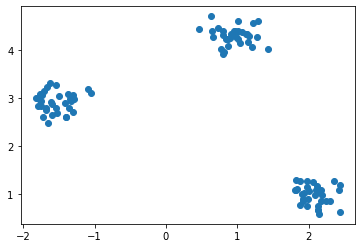

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['X_value'],data['Y_value'])

In [6]:
#notice we have 3 groups here. here we can use the k-means algo

In [7]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [8]:
import numpy as np

In [9]:
# A helper function to calculate the Euclidean diatance between the data 
# points and the centroids

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [10]:
# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
print(data.head())

     Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance
0  Object 1  2.170586  0.856004     4.465123     2.456503     1.652823
1  Object 2  0.797177  4.381168     1.837154     3.048851     2.232840
2  Object 3  2.244718  0.866662     4.510654     2.525423     1.651569
3  Object 4  0.653491  4.261239     1.674000     2.890136     2.216992
4  Object 5  0.766559  4.019784     1.766670     2.698805     1.957324


In [11]:

# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)

# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({0: 'C1', 1: 'C2', 2: 'C3'})

# Get a preview of the data
print(data.head(10))


      Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance  \
0   Object 1  2.170586  0.856004     4.465123     2.456503     1.652823   
1   Object 2  0.797177  4.381168     1.837154     3.048851     2.232840   
2   Object 3  2.244718  0.866662     4.510654     2.525423     1.651569   
3   Object 4  0.653491  4.261239     1.674000     2.890136     2.216992   
4   Object 5  0.766559  4.019784     1.766670     2.698805     1.957324   
5   Object 6  0.906688  4.335057     1.935903     3.043404     2.136063   
6   Object 7 -1.756398  2.830318     1.392944     2.047467     3.770893   
7   Object 8 -1.337020  2.935393     1.116679     1.831165     3.365304   
8   Object 9  2.189726  0.979156     4.393160     2.445827     1.532633   
9  Object 10  0.849406  4.231239     1.863806     2.925905     2.078715   

  Cluster  
0      C3  
1      C1  
2      C3  
3      C1  
4      C1  
5      C1  
6      C1  
7      C1  
8      C3  
9      C1  


In [12]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (-0.5911425513006126, 3.4657547193562874)
Centroid 2 (1.8327759404388673, 1.8646195450791323)


In [13]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [14]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[-1.538563    2.91165191]
 [ 2.0720792   0.98848385]
 [ 0.95164831  4.28882085]]
[1 2 1 2 2 2 0 0 1 2 2 2 1 2 0 1 0 2 0 0 0 0 0 2 1 1 1 1 0 0 2 1 1 2 0 0 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 0 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 2 2 1
 1 2 2 2 0 1 2 2 1 2 1 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0]


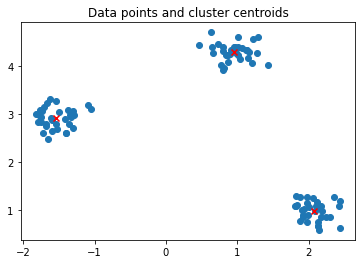

In [15]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [16]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8816040239688525


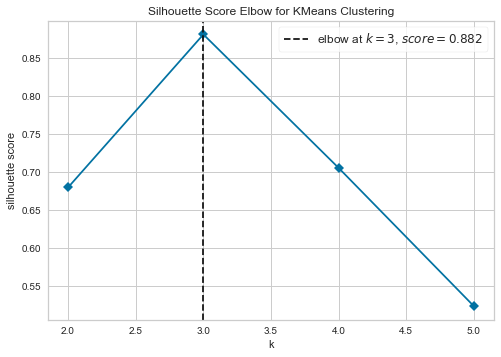

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof() 